<a href="https://colab.research.google.com/github/theresatvan/cs-gy-6613-assignments/blob/main/ttv2006_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x = 1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p = 1/2$.

Your job is to sample $n = 50$ posts and estimate the approval rate of the CEO by considering the statistics of $y = x_1 + x_2 + ... + x_n$. What is the probability that 25 employees approve the CEO?

**Answer:**

As we are seeking 25 successes from a sample of 50 Bernoulli trials, use a Binomial distribution which is given as

<div align="center">
$p(m | N, p) =
  \begin{pmatrix}
    N\\
    m
  \end{pmatrix}
  p^m(1-p)^{N-m}$
</div>

where $m$ is the number of successes, $N$ is the amount of Bernoulli trials, and $p$ is the probability of a success.

In [ ]:
import scipy.special

m = 25
N = 50
p = 0.5
binom_coef = scipy.special.binom(N,m)

# calculate Binomial distribution
p_hat = binom_coef * p**m * (1-p)**(N-m)
print('Probability of 25 successes from a sample of 50 posts: {0}'.format(p_hat))

Probability of 25 successes from a sample of 50 posts: 0.11227517265921709


## Question 1b (10 points)

Following your findings in Q1a, read about the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that

<div align="center">
  $z = \frac{y - \mu_y}{\sigma_y}$
</div>

is normally distributed with mean 0 and variance 1.

Can you find the probability that 25 employees approve the CEO using the Gaussian approximation?

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`


**Answer:**

To use Central Limit Theorem to find probability that 25 employees approve the CEO, calculate $P(24.5 \leq X \leq 25.5)$, where $μ = np = 25$ and $σ^2 = np(1 - p) = 12.5$.

Calculate $Z$ variables to standardize $X$ for Gaussian approximation.
<div align="center">
$P(\frac{24.5 - 25}{\sqrt{12.5}} < \frac{X - μ}{σ} \leq \frac{25.5 - 25}{\sqrt{12.5}})$
</div>
<div align="center">
$= P(-0.141 < Z \leq 0.141)$
</div>
<div align="center">
$ = P(Z \leq 0.141) - P(Z \leq -0.141)$
</div>

Now, we can calculate the normal CDFs of $Z$, such that $Z \sim 𝒩(0,1)$.
<div align="center">
$P(Z \leq 0.141) - P(Z \leq -0.141)$
</div>
<div align="center">
$≈ 0.556 - 0.444$
</div>
<div align="center">
$≈ 0.112$
</div>

In [ ]:
import math
from scipy.stats import norm

# standardize X for Gaussian approximation
def get_z_value(mean, variance, X):
  return (X - mean) / math.sqrt(variance)

mean = N * p
variance = N * p * (1 - p)

# define upper and lower bounds
upper = get_z_value(mean, variance, 25.5)
lower = get_z_value(mean, variance, 24.5)

# normal CDFs of upper and lower bounds
norm_upper = norm.cdf(upper)
norm_lower = norm.cdf(lower)

print("Upper and lower bounds after standardizing for Gaussian approximation: ({0}, {1})".format(lower, upper))
print("Gaussian approximation of binomial distribution: {0} - {1} = {2}".format(norm_upper, norm_lower, norm_upper - norm_lower))

Upper and lower bounds after standardizing for Gaussian approximation: (-0.1414213562373095, 0.1414213562373095)
Gaussian approximation of binomial distribution: 0.5562314580091424 - 0.4437685419908576 = 0.11246291601828484


## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1.

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.**

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ?

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`

**Answer:**

Given the sequence of 0011 drawn, order of events must be

1.   Pick ball with number 0 from Urn 0 given H is flipped, or pick ball with number 0 from Urn 1 given T is flipped. This event can be denoted as $x_1$ where 
<div align="center">
$P(x_1) = P(\text{ball 0 from Urn 0}) ∪ P(\text{ball 0 from Urn 1}) = (\frac{1}{2})( \frac{1}{3}) + (\frac{1}{2})(\frac{5}{6}) = \frac{7}{12}$.
</div>

2.   Pick ball with number 0 from Urn 0. This event can be denoted as $x_2$ where 
<div align="center">
$P(x_2) = P(\text{ball 0 from Urn 0}) = \frac{1}{3}$
</div>

3.   Pick ball with number 1 from Urn 0. This event can be denoted as $x_3$ where 
<div align="center">
$P(x_3) = P(\text{ball 1 from Urn 0}) = \frac{2}{3}$
</div>

4.   Pick ball with number 1 from Urn 1. This event can be denoted as $x_4$ where
<div align="center">
$P(x_4) = P(\text{ball 1 from Urn 1}) = \frac{1}{6}$
</div>

Sampling with replacement is occurring, so all events are independent. We can conclude that
<div align="center">
$P(x_1, x_2, x_3, x_4) = P(x_4) · P(x_3) · P(x_2) · P(x_1)$
</div>
<div align="center">
$= \frac{1}{6} · \frac{2}{3} · \frac{1}{3} · \frac{7}{12} = \frac{7}{324} ≈ 0.0216$
</div>

## Question 3 (20 points)

Referring to Example 6.6 of the [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation.

**Answer:**

The bivariate normal distribution is given as 

<div align="center">
$
p(x_1, x_2) = 𝒩(
  \begin{bmatrix}
  0 \\
  2
  \end{bmatrix},
  \begin{bmatrix}
  0.3 & -1 \\
  -1 & 5
  \end{bmatrix})
$
</div>

Given a set of uncorrelated values, Cholesky factorization is able to generate correlated random variables.

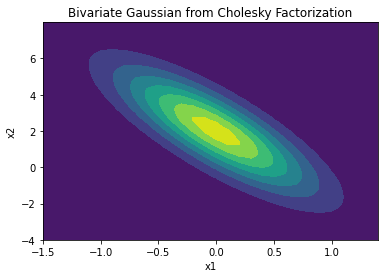

In [ ]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Initiate mean vector and covariance matrix
mu = np.array([0, 2])
sigma = np.array([[0.3,-1],[-1,5]])

# Calculate Cholesky factor L from the covariance matrix
L = np.linalg.cholesky(sigma)

# Generate randomized data from a normal distribution and perform Cholesky factorization
data = np.random.normal(size=(1000,2))
data = np.dot(data, L) + mu

# Store coordinates of grid into a single 3D array
X1, X2 = np.mgrid[-1.5:1.5:0.1, -4:8:.01]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1
pos[:, :, 1] = X2

# Retrieve PDFs of the bivariate normal distribution
bivariate = multivariate_normal(mu, sigma)
Z = bivariate.pdf(pos)

# Plot contour graph
plt.contourf(X1, X2, Z)
plt.title('Bivariate Gaussian from Cholesky Factorization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the Math for ML textbook in your course site is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch.


1.   Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.
2.   Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.



**Answer:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

! mkdir ~/.kaggle
! cp '/content/gdrive/My Drive/Kaggle/kaggle.json' ~/.kaggle/
! chmod 600 '/root/.kaggle/kaggle.json'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


  0% 0.00/1.78k [00:00<?, ?B/s]
100% 1.78k/1.78k [00:00<00:00, 1.78MB/s]


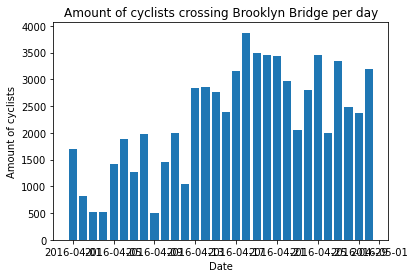

In [ ]:
! kaggle datasets download -d new-york-city/nyc-east-river-bicycle-crossings

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/nyc-east-river-bicycle-crossings.zip", compression='zip')

date = pd.to_datetime(df['Date'], format='%Y-%m-%d')
cyclists_bb = df['Brooklyn Bridge']

plt.bar(date, cyclists_bb)
plt.title("Amount of cyclists crossing Brooklyn Bridge per day")
plt.xlabel('Date')
plt.ylabel('Amount of cyclists')
plt.show()

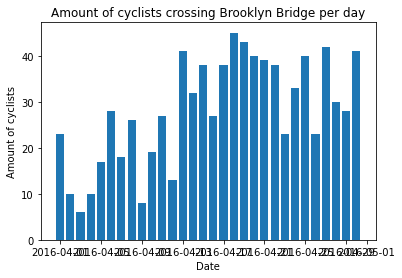

In [ ]:
import numpy as np

# Generate Poisson trials
def poisson(lam):
  el, n, u = np.exp(-lam), 0, np.random.uniform(0,1)
  pp, fact, pow = el, 1, 1

  while u > pp:
    n += 1
    fact, pow = n * fact, lam * pow
    pp = pp + (pow / fact) * el

  return n

# Store predictions
# Lambda is chosen to be the actual number of cyclists seen that day divided by 100 to prevent underflow and overflow errors
p_hat = np.array([poisson(cyclists / 100) for cyclists in cyclists_bb])

# Plot the histogram
plt.bar(date, p_hat)
plt.title('Poisson')
plt.title("Amount of cyclists crossing Brooklyn Bridge per day")
plt.xlabel('Date')
plt.ylabel('Amount of cyclists')
plt.show()

## Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process.

Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $λ = [1,3,4]$ and the service time of the requests as an exponential random variable with rate $μ = 4$.

**Answer**:

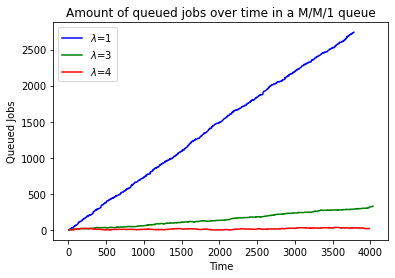

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Simulate a M/M/1 queue
def mm1(mu, lam):
  queue = deque([])
  times = []
  queue_size = []
  next_arrival = time = np.random.poisson(lam)

  # Generating 1000 samples
  for i in range(1000):
    while next_arrival <= time:
      queue.append(next_arrival)
      next_arrival += np.random.poisson(lam)

    queue.popleft()

    if queue:
      time += np.random.exponential(mu)
    else:
      time = next_arrival + np.random.exponential(mu)

    times.append(time)
    queue_size.append(len(queue))

  return times, queue_size

# Initialize parameters
mu = 4
lams = [1, 3, 4]
colors = ['b', 'g', 'r']

# Plot results
for i, lam in enumerate(lams):
  x, y = mm1(mu, lam)
  plt.plot(x, y, colors[i], label=r'$\lambda$='+str(lam))

plt.title('Amount of queued jobs over time in a M/M/1 queue')
plt.xlabel('Time')
plt.ylabel('Queued Jobs')
plt.legend()
plt.show()